In [101]:
# Notes:

# data downloaded from yahoo finance over past 20 years from Jan 3, 2000 to Apr 3, 2020
# dates are inconsistent because stock market is only open on business days

#TODO: 
    #Graph Line Plot and Candlestick of Stock Data
    #Graph each year as own dataframe and compare trends
    #Attempt MACD model

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from datetime import datetime
import scipy.stats as stats
import calendar
plt.style.use('ggplot')

In [25]:
dji20 = pd.read_csv('../data/^DJI.csv')
dji20

Date          Open          High           Low         Close  \
0     2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1     2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2     2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3     2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4     2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   
...          ...           ...           ...           ...           ...   
5091  2020-03-30  21678.220703  22378.089844  21522.080078  22327.480469   
5092  2020-03-31  22208.419922  22480.369141  21852.080078  21917.160156   
5093  2020-04-01  21227.380859  21487.240234  20784.429688  20943.509766   
5094  2020-04-02  20819.460938  21477.769531  20735.019531  21413.439453   
5095  2020-04-03  21285.929688  21447.810547  20863.089844  21052.529297   

         Adj Close     Volume  
0     11357.509766  169750000  
1     10997.929688  178420000  
2     11122.650391  203190000  
3     11253.259766  176550000  
4     11522.559570  184900000  
...            ...        ...  
5091  22327.480469  545540000  
5092  21917.160156  571210000  
5093  20943.509766  506680000  
5094  21413.439453  529540000  
5095  21052.529297  450010000  

[5096 rows x 7 columns]

In [26]:
nasdaq20 = pd.read_csv('../data/^IXIC.csv')
nasdaq20

Date         Open         High          Low        Close  \
0     2000-01-03  4186.189941  4192.189941  3989.709961  4131.149902   
1     2000-01-04  4020.000000  4073.250000  3898.229980  3901.689941   
2     2000-01-05  3854.350098  3924.209961  3734.870117  3877.540039   
3     2000-01-06  3834.439941  3868.760010  3715.620117  3727.129883   
4     2000-01-07  3711.090088  3882.669922  3711.090088  3882.620117   
...          ...          ...          ...          ...          ...   
5091  2020-03-30  7583.459961  7784.350098  7539.970215  7774.149902   
5092  2020-03-31  7740.060059  7880.310059  7642.859863  7700.100098   
5093  2020-04-01  7459.500000  7566.370117  7301.979980  7360.580078   
5094  2020-04-02  7317.450195  7501.700195  7307.950195  7487.310059   
5095  2020-04-03  7477.270020  7518.720215  7288.109863  7373.080078   

        Adj Close      Volume  
0     4131.149902  1510070000  
1     3901.689941  1511840000  
2     3877.540039  1735670000  
3     3727.129883  1598320000  
4     3882.620117  1634930000  
...           ...         ...  
5091  7774.149902  3846900000  
5092  7700.100098  4059700000  
5093  7360.580078  3685510000  
5094  7487.310059  3608190000  
5095  7373.080078  3279100000  

[5096 rows x 7 columns]

In [27]:
sandp20 = pd.read_csv('../data/^GSPC.csv')
sandp20

Date         Open         High          Low        Close  \
0     2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1     2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2     2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3     2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4     2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
...          ...          ...          ...          ...          ...   
5091  2020-03-30  2558.979980  2631.800049  2545.280029  2626.649902   
5092  2020-03-31  2614.689941  2641.389893  2571.149902  2584.590088   
5093  2020-04-01  2498.080078  2522.750000  2447.489990  2470.500000   
5094  2020-04-02  2458.540039  2533.219971  2455.790039  2526.899902   
5095  2020-04-03  2514.919922  2538.179932  2459.959961  2488.649902   

        Adj Close      Volume  
0     1455.219971   931800000  
1     1399.420044  1009000000  
2     1402.109985  1085500000  
3     1403.449951  1092300000  
4     1441.469971  1225200000  
...           ...         ...  
5091  2626.649902  5746220000  
5092  2584.590088  6568290000  
5093  2470.500000  5947900000  
5094  2526.899902  6454990000  
5095  2488.649902  6087190000  

[5096 rows x 7 columns]

In [28]:
dji20.nunique(axis=0)

Date         5096
Open         5064
High         5068
Low          5066
Close        5069
Adj Close    5069
Volume       4706
dtype: int64

In [29]:
dji20.describe()

Open          High           Low         Close     Adj Close  \
count   5096.000000   5096.000000   5096.000000   5096.000000   5096.000000   
mean   14194.793631  14277.854878  14107.844595  14197.127472  14197.127472   
std     5359.291240   5372.620684   5343.809892   5359.429313   5359.429313   
min     6547.009766   6709.609863   6469.950195   6547.049805   6547.049805   
25%    10427.897217  10490.490235  10366.989746  10427.112305  10427.112305   
50%    12162.360351  12247.955078  12084.889649  12166.655274  12166.655274   
75%    17197.681641  17287.158203  17115.642090  17199.080078  17199.080078   
max    29440.470703  29568.570313  29406.750000  29551.419922  29551.419922   

             Volume  
count  5.096000e+03  
mean   2.222190e+08  
std    1.088084e+08  
min    8.410000e+06  
25%    1.453425e+08  
50%    2.159800e+08  
75%    2.743325e+08  
max    2.190810e+09

In [30]:
dji20.shape

(5096, 7)

In [68]:
dji20['Close'].idxmax()
#max close at index 5059
dji20.iloc[5059:5060]
#date max close on 2020-02-12

Date      Open          High       Low         Close  \
5059  2020-02-12  29406.75  29568.570313  29406.75  29551.419922   

         Adj Close     Volume   Date_num  
5059  29551.419922  309530000 2020-02-12

In [32]:
dji20.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

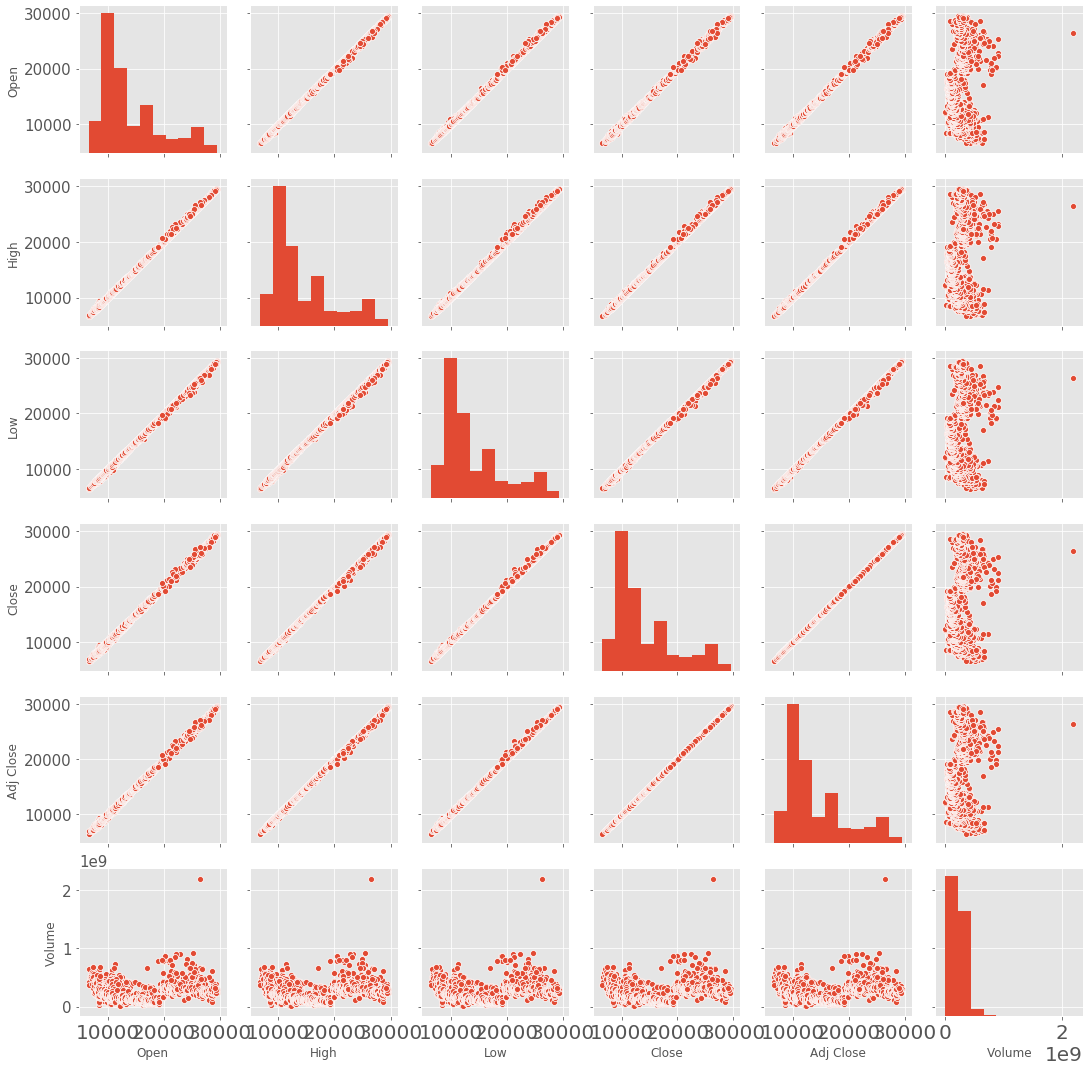

In [33]:
sns.pairplot(dji20)

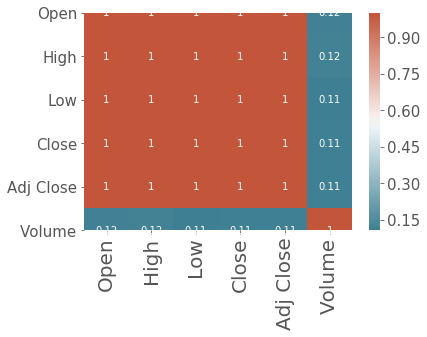

In [34]:
# calculate correlation matrix
corr = dji20.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, annot=True, \
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

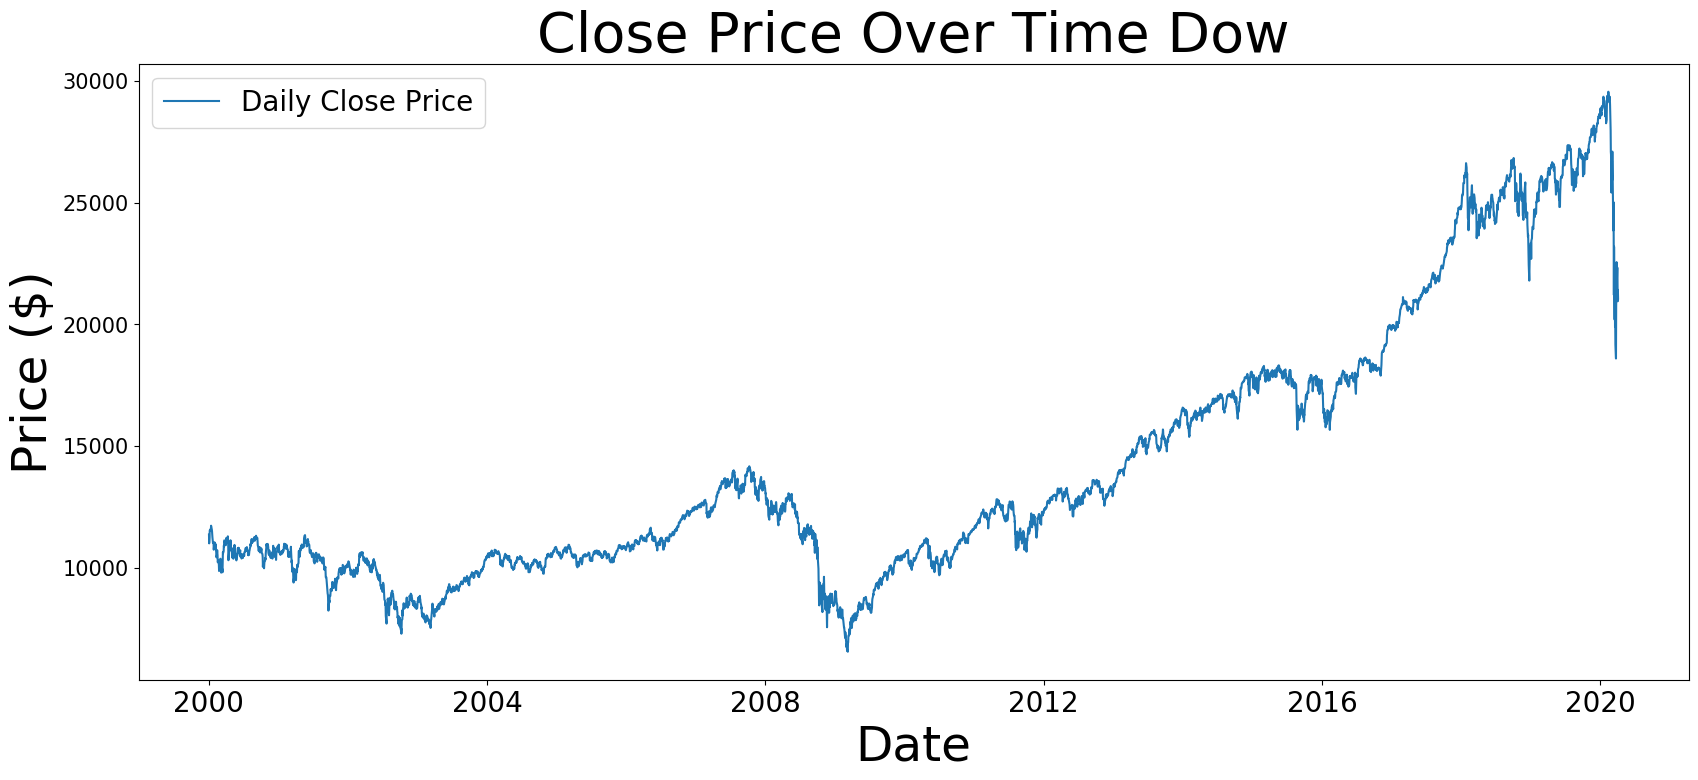

In [192]:
#Add Datetime format column
dji20['Date_num'] = dji20['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

fig, ax = plt.subplots(1, figsize = (20, 8))

dates = dji20['Date_num'].to_list()
ax.plot(dates, dji20['Adj Close'], label = "Daily Close Price")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Price ($)', fontsize = 35)
ax.set_title('Close Price Over Time Dow', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)


plt.savefig('../images/20 year dji.png')

In [135]:
dji20['Adj Close'][5095] - dji20['Adj Close'][0] / 5095

21050.300148861435

In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dji20['Date'],
                open=dji20['Open'],
                high=dji20['High'],
                low=dji20['Low'],
                close=dji20['Adj Close'])])

fig.update_layout(
    title='DJI Candlestick',
    yaxis_title='Price',
    shapes = [dict(
        x0='2000-01-01', x1='2020-04-03', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2010-08-08', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Note Here')]
)

fig.show()

(array([  8.,  15.,  55., 133., 185., 123., 160., 355., 664., 437., 237.,
        120., 255., 229., 191., 106.,  41.,  44.,  61.,  75.,  77., 132.,
        104.,  95., 212., 107.,  30.,  11.,  22.,  26.,  35.,  53.,  36.,
         34.,  17.,  14.,  35.,  22.,  52.,  77.,  73.,  70.,  76.,  63.,
         47.,  16.,  20.,  14.,  16.,  16.]),
 array([ 6547.049805  ,  7007.13720734,  7467.22460968,  7927.31201202,
         8387.39941436,  8847.4868167 ,  9307.57421904,  9767.66162138,
        10227.74902372, 10687.83642606, 11147.9238284 , 11608.01123074,
        12068.09863308, 12528.18603542, 12988.27343776, 13448.3608401 ,
        13908.44824244, 14368.53564478, 14828.62304712, 15288.71044946,
        15748.7978518 , 16208.88525414, 16668.97265648, 17129.06005882,
        17589.14746116, 18049.2348635 , 18509.32226584, 18969.40966818,
        19429.49707052, 19889.58447286, 20349.6718752 , 20809.75927754,
        21269.84667988, 21729.93408222, 22190.02148456, 22650.1088869 ,
        23

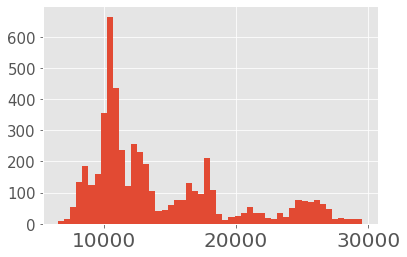

In [37]:
plt.hist(dji20['Adj Close'], bins = 50)

In [38]:
#Copy dji20 df
df = dji20.copy()

#Add Datetime format column

df['Date_num'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#Add Year, Month, Day column

df['Year'] = df['Date'].apply(lambda x: "".join(x.split("-")[0]))
df['Month'] = df['Date'].apply(lambda x: "".join(x.split("-")[1]))
df['Day'] = df['Date'].apply(lambda x: "".join(x.split("-")[2]))

#Add Close Difference Column
df['Adj Close Change'] = df['Adj Close'].diff()

#Fill starting NaN value with 0
df.fillna(0, inplace = True)

#Add Label column for increase or decrease
df['Label'] = df['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)

df.head()

Date          Open          High           Low         Close  \
0  2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1  2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2  2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3  2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4  2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   

      Adj Close     Volume   Date_num  Year Month Day  Adj Close Change  Label  
0  11357.509766  169750000 2000-01-03  2000    01  03          0.000000      0  
1  10997.929688  178420000 2000-01-04  2000    01  04       -359.580078      0  
2  11122.650391  203190000 2000-01-05  2000    01  05        124.720703      1  
3  11253.259766  176550000 2000-01-06  2000    01  06        130.609375      1  
4  11522.559570  184900000 2000-01-07  2000    01  07        269.299804      1

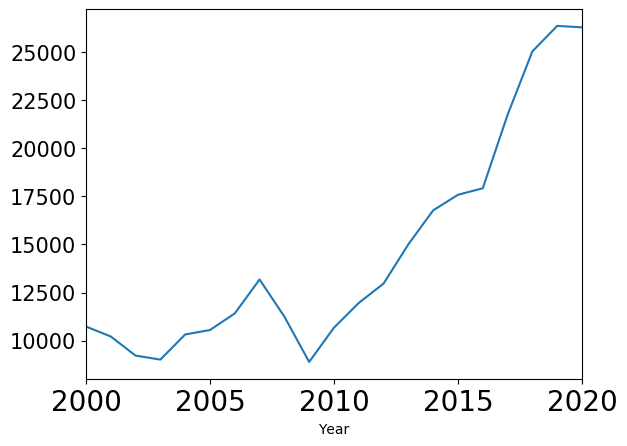

In [190]:
df.groupby('Year')['Adj Close'].mean().plot()


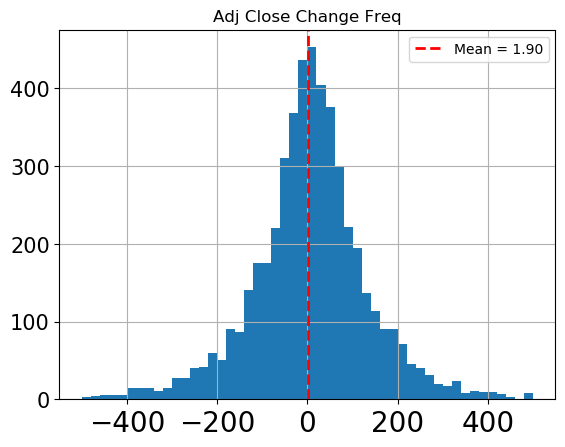

In [193]:
df['Adj Close Change'].hist(bins = 50, range=[-500, 500])
plt.axvline(df['Adj Close Change'].mean(), color='r', linestyle='dashed', linewidth=2, label = f"Mean = {df['Adj Close Change'].mean():.2f}")
plt.title('Adj Close Change Freq')

plt.legend()
            
mpl.rcParams.update(mpl.rcParamsDefault)

plt.savefig('../images/dji close change hist.png')

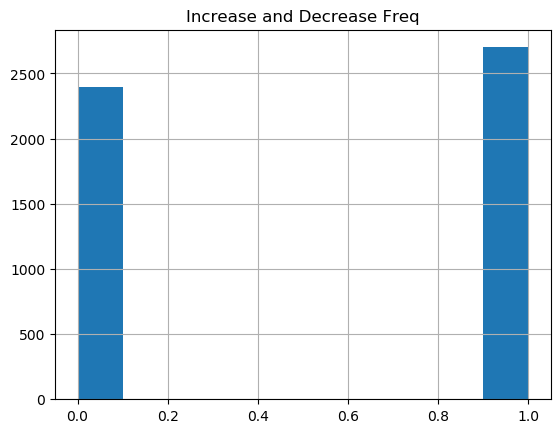

In [194]:
df['Label'].hist(bins = [0,.1, .90, 1])
plt.title('Increase and Decrease Freq')

plt.savefig('../images/dji increase and decrease hist.png')

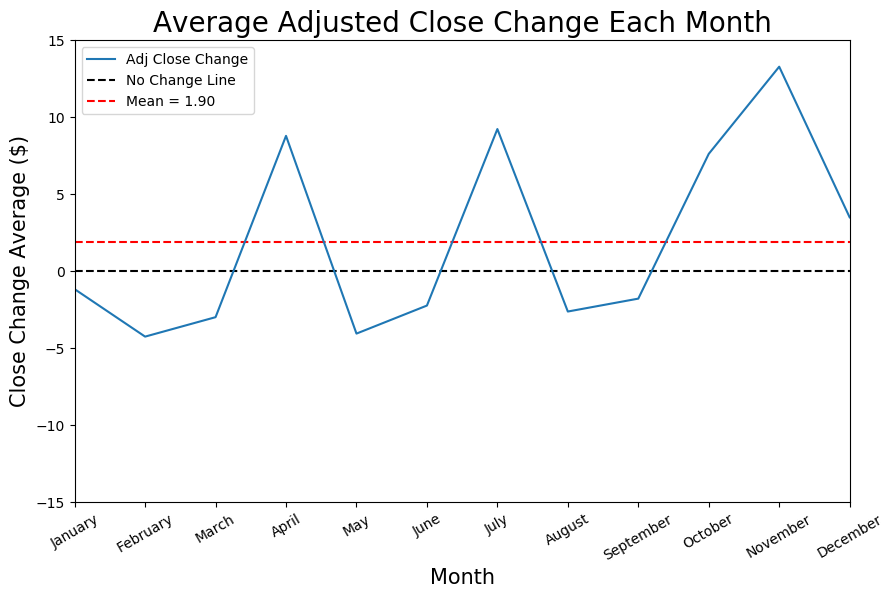

In [195]:
df.groupby('Month')['Adj Close Change'].mean().plot(figsize = (10, 6)).set_ylim([-15,15])

plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Adj Close Change'].mean(), 0, 31, label = f"Mean = {df['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Adjusted Close Change Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Close Change Average ($)', fontsize = 15)
locs, labels = plt.xticks()           
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
           
plt.legend()

plt.savefig('../images/dji average monthly close change.png')

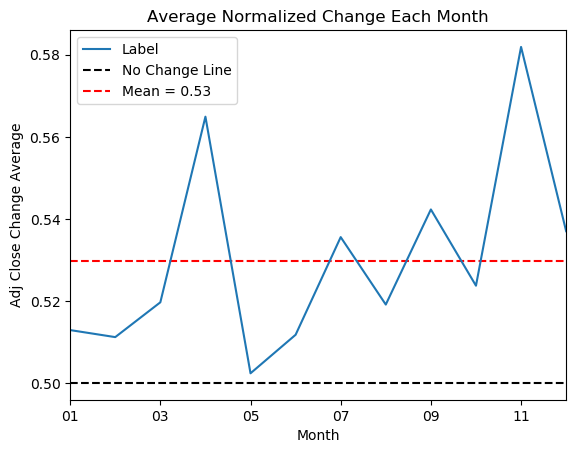

In [196]:
df.groupby('Month')['Label'].mean().plot()

plt.hlines(0.5, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Label'].mean(), 0, 31, label = f"Mean = {df['Label'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Normalized Change Each Month')
plt.xlabel('Month')
plt.ylabel('Adj Close Change Average')
plt.legend()
           
plt.savefig('../images/dji normalized monthly close change.png')

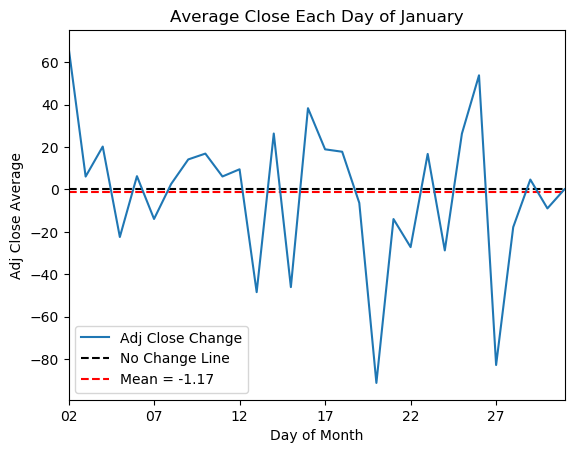

In [46]:
#All January Data from the past 20 years

Jan = df[df['Month'] == '01'].reset_index(drop=True)

#January Data 
Jan.groupby('Day')['Adj Close Change'].mean().plot()
plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(Jan['Adj Close Change'].mean(), 0, 31, label = f"Mean = {Jan['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Close Each Day of January')
plt.xlabel('Day of Month')
plt.ylabel('Adj Close Average')
plt.legend()

In [47]:
Jan.shape

(427, 13)

In [48]:
print(Jan['Adj Close Change'].mean())

print(Jan['Label'].mean())

-1.165615393442596
0.5128805620608899


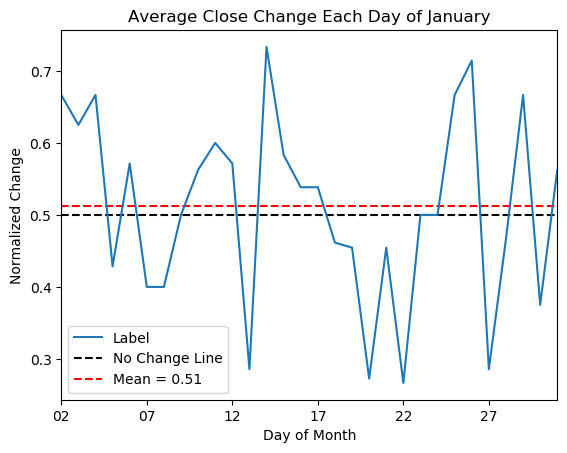

In [49]:
Jan.groupby('Day')['Label'].mean().plot()
plt.hlines(.5, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(Jan['Label'].mean(), 0, 31, label = f"Mean = {Jan['Label'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Close Change Each Day of January')
plt.xlabel('Day of Month')
plt.ylabel('Normalized Change')
plt.legend()


In [50]:
#other months

Feb = df[df['Month'] == '02'].reset_index(drop=True)
Mar = df[df['Month'] == '03'].reset_index(drop=True)
Apr = df[df['Month'] == '04'].reset_index(drop=True)
May = df[df['Month'] == '05'].reset_index(drop=True)
Jun = df[df['Month'] == '06'].reset_index(drop=True)
Jul = df[df['Month'] == '07'].reset_index(drop=True)
Aug = df[df['Month'] == '08'].reset_index(drop=True)
Sep = df[df['Month'] == '09'].reset_index(drop=True)
Oct = df[df['Month'] == '10'].reset_index(drop=True)
Nov = df[df['Month'] == '11'].reset_index(drop=True)
Dec = df[df['Month'] == '12'].reset_index(drop=True)


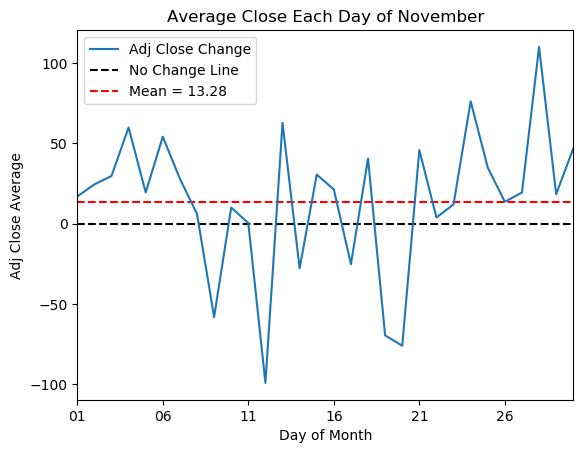

In [51]:
Nov.groupby('Day')['Adj Close Change'].mean().plot()
plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(Nov['Adj Close Change'].mean(), 0, 31, label = f"Mean = {Nov['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Close Each Day of November')
plt.xlabel('Day of Month')
plt.ylabel('Adj Close Average')
plt.legend()

In [52]:
#means for 'Adj Close Change' and 'Label' Columns

print(df['Adj Close Change'].mean())

print(df['Label'].mean())

1.9024763600863426
0.5298273155416012


In [53]:
#mean = 20 Year Average across all months (null hypothesis)
#Actual = Average Across Each Month

diff_table = pd.DataFrame(
    {'mean': np.repeat(1.9024763600863426, 12) , 'actual': df.groupby('Month')['Adj Close Change'].mean()}
)
print(diff_table)



           mean     actual
Month                     
01     1.902476  -1.165615
02     1.902476  -4.246485
03     1.902476  -2.983600
04     1.902476   8.789807
05     1.902476  -4.050213
06     1.902476  -2.229786
07     1.902476   9.232318
08     1.902476  -2.617304
09     1.902476  -1.779820
10     1.902476   7.619816
11     1.902476  13.280684
12     1.902476   3.498928


In [54]:
#mean = 20 Year Average across all months
#Actual = Average Across Each Month

label_table = pd.DataFrame(
    {'mean': np.repeat(0.5298273155416012, 12) , 'actual': df.groupby('Month')['Label'].mean()}
)
print(label_table)


           mean    actual
Month                    
01     0.529827  0.512881
02     0.529827  0.511166
03     0.529827  0.519651
04     0.529827  0.564904
05     0.529827  0.502347
06     0.529827  0.511737
07     0.529827  0.535545
08     0.529827  0.519101
09     0.529827  0.542289
10     0.529827  0.523702
11     0.529827  0.581907
12     0.529827  0.536993


In [55]:
# MAKE A DATASET THAT SHOWS AN INCREASE OR DECREASE FOR EACH MONTH TO MAKE IT DISCRETE (Difference between end and beginning)
# USE RESAMPLE TO ORGANIZE DATA BY BUSINESS MONTH END
# Get frequencies for each month end increase in price
# Chi-squared on observed frequencies

In [56]:
# BMS = Business Month Start
# BM = Business Month End

resample = df[['Date_num','Adj Close Change']].resample('BM', on='Date_num').sum()

#Add Label column for increase or decrease
resample['Label'] = resample['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)
resample['Date'] = resample.index.values

resample

Adj Close Change  Label       Date
Date_num                                      
2000-01-31       -416.979493      0 2000-01-31
2000-02-29       -812.220703      0 2000-02-29
2000-03-31        793.610352      1 2000-03-31
2000-04-28       -188.009766      0 2000-04-28
2000-05-31       -211.580078      0 2000-05-31
...                      ...    ...        ...
2019-12-31        487.029297      1 2019-12-31
2020-01-31       -282.410156      0 2020-01-31
2020-02-28      -2846.669922      0 2020-02-28
2020-03-31      -3492.199219      0 2020-03-31
2020-04-30       -864.630859      0 2020-04-30

[244 rows x 3 columns]

In [57]:
#Add Year, Month, Day Columns
resample['Year'] = resample['Date'].apply(lambda x: x.year)
resample['Month'] = resample['Date'].apply(lambda x: x.month)
resample['Day'] = resample['Date'].apply(lambda x: x.day)

resample

Adj Close Change  Label       Date  Year  Month  Day
Date_num                                                        
2000-01-31       -416.979493      0 2000-01-31  2000      1   31
2000-02-29       -812.220703      0 2000-02-29  2000      2   29
2000-03-31        793.610352      1 2000-03-31  2000      3   31
2000-04-28       -188.009766      0 2000-04-28  2000      4   28
2000-05-31       -211.580078      0 2000-05-31  2000      5   31
...                      ...    ...        ...   ...    ...  ...
2019-12-31        487.029297      1 2019-12-31  2019     12   31
2020-01-31       -282.410156      0 2020-01-31  2020      1   31
2020-02-28      -2846.669922      0 2020-02-28  2020      2   28
2020-03-31      -3492.199219      0 2020-03-31  2020      3   31
2020-04-30       -864.630859      0 2020-04-30  2020      4   30

[244 rows x 6 columns]

In [58]:
# Rearrange Columns
resample = resample[['Date', 'Year', 'Month', 'Day', 'Adj Close Change', 'Label']]
resample.reset_index(drop=True)

Date  Year  Month  Day  Adj Close Change  Label
0   2000-01-31  2000      1   31       -416.979493      0
1   2000-02-29  2000      2   29       -812.220703      0
2   2000-03-31  2000      3   31        793.610352      1
3   2000-04-28  2000      4   28       -188.009766      0
4   2000-05-31  2000      5   31       -211.580078      0
..         ...   ...    ...  ...               ...    ...
239 2019-12-31  2019     12   31        487.029297      1
240 2020-01-31  2020      1   31       -282.410156      0
241 2020-02-28  2020      2   28      -2846.669922      0
242 2020-03-31  2020      3   31      -3492.199219      0
243 2020-04-30  2020      4   30       -864.630859      0

[244 rows x 6 columns]

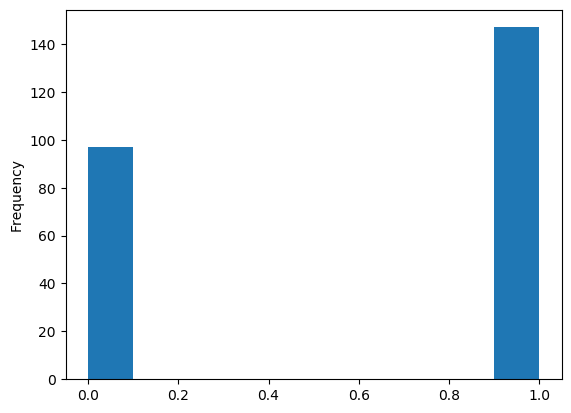

In [59]:
resample["Label"].plot(kind = 'hist')


In [91]:
monthly_increase_count = resample.groupby('Month')['Label'].sum()

monthly_increase_count

Month
1     10
2     13
3     13
4     16
5     11
6      7
7     15
8     11
9     10
10    14
11    14
12    13
Name: Label, dtype: int64

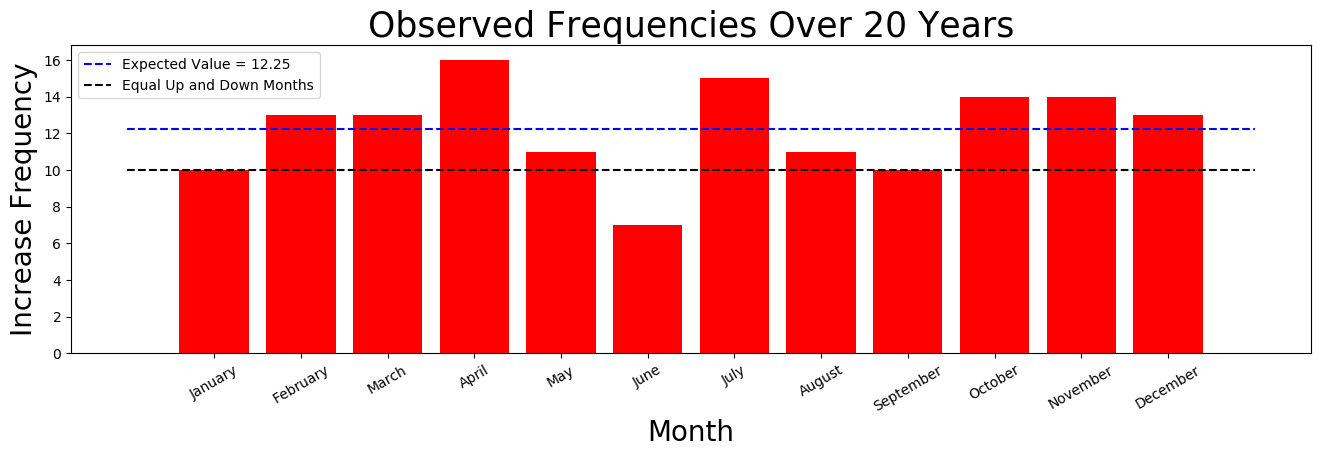

In [197]:
fig, ax = plt.subplots(1, figsize = (16, 4))
ax.bar(range(1, 13), monthly_increase_count, align='center', color = 'r');

plt.title('Observed Frequencies Over 20 Years', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Increase Frequency', fontsize = 20)

plt.hlines(monthly_increase_count.mean(), 0, 13, label = f"Expected Value = {monthly_increase_count.mean():.2f}", linestyles = 'dashed', color = 'b')
plt.hlines(10, 0, 13, label = "Equal Up and Down Months", linestyles = 'dashed')

locs, labels = plt.xticks()           
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=30)
mpl.rcParams.update(mpl.rcParamsDefault)

plt.legend()

plt.savefig('../images/dji monthly increase freqs.png')

In [94]:
#Expected to be 12.25 for 12 months with 147 samples 
# (Null Hypothesis = Uniform Distribution with PMF for each month being 1/12 = 147 / 12)

monthly_increase_count_contingency_table = pd.DataFrame(
    {'expected': np.repeat(147/12, 12), 'actual': monthly_increase_count}
)
print(monthly_increase_count_contingency_table)

       expected  actual
Month                  
1         12.25      10
2         12.25      13
3         12.25      13
4         12.25      16
5         12.25      11
6         12.25       7
7         12.25      15
8         12.25      11
9         12.25      10
10        12.25      14
11        12.25      14
12        12.25      13


In [95]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

In [96]:
#12 months choosing 1 month = 11 degrees of freedom

T = chi_squared_test_statistic(monthly_increase_count_contingency_table.actual, 
                               monthly_increase_count_contingency_table.expected)

test_distribution = stats.chi2(11)
p_value = 1 - test_distribution.cdf(T)
print("p-value for All Months: {0:.10f}".format(p_value))

p-value for All Months: 0.8904667529


In [100]:
#The null hypothesis is that there is a uniform distribution among all months where the expected value is 149/12
#The alternate hypothesis is that not all months follow a uniform distribution

# P-VALUE IS TOO LARGE TO CONSIDER SEASONALITY AS A BIG FACTOR
# The data generated is consistent with seasonality following a uniform distribution

In [ ]:
#FUTURE APPLICATIONS: Use datetime to measure seasonality of other topics, such as seasonal virus or bacteria activity

In [102]:
df.head()

Date          Open          High           Low         Close  \
0  2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1  2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2  2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3  2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4  2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   

      Adj Close     Volume   Date_num  Year Month Day  Adj Close Change  Label  
0  11357.509766  169750000 2000-01-03  2000    01  03          0.000000      0  
1  10997.929688  178420000 2000-01-04  2000    01  04       -359.580078      0  
2  11122.650391  203190000 2000-01-05  2000    01  05        124.720703      1  
3  11253.259766  176550000 2000-01-06  2000    01  06        130.609375      1  
4  11522.559570  184900000 2000-01-07  2000    01  07        269.299804      1

In [ ]:
#'BQ' = Business Quarter End
#'BA' = Business Year End

resample_year = df[['Date_num','Adj Close Change']].resample('BM', on='Date_num').sum()